In [10]:
import os
import random
import numpy as np 
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
import math

TRAIN_DIR = '/Users/shaaky/Codes/CVPR/CIFAR-10/test'
CATEGORIES = []
for c in os.listdir(TRAIN_DIR):
    CATEGORIES.append(c)
print(CATEGORIES)

['cat', 'dog', 'truck', 'bird', 'airplane', 'ship', 'frog', 'horse', 'deer', 'automobile']


In [11]:
TRAIN_DATA = []
for c in CATEGORIES:
    path = os.path.join(TRAIN_DIR, c)
    label = CATEGORIES.index(c)
    for img in tqdm(os.listdir(path)):
        img_path = os.path.join(path, img)
        img_arr = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (32, 32))
        TRAIN_DATA.append([img_arr, label])

print(f"Total Train Data: {len(TRAIN_DATA)}")

100%|██████████| 1000/1000 [00:00<00:00, 9197.69it/s]

Total Train Data: 10000


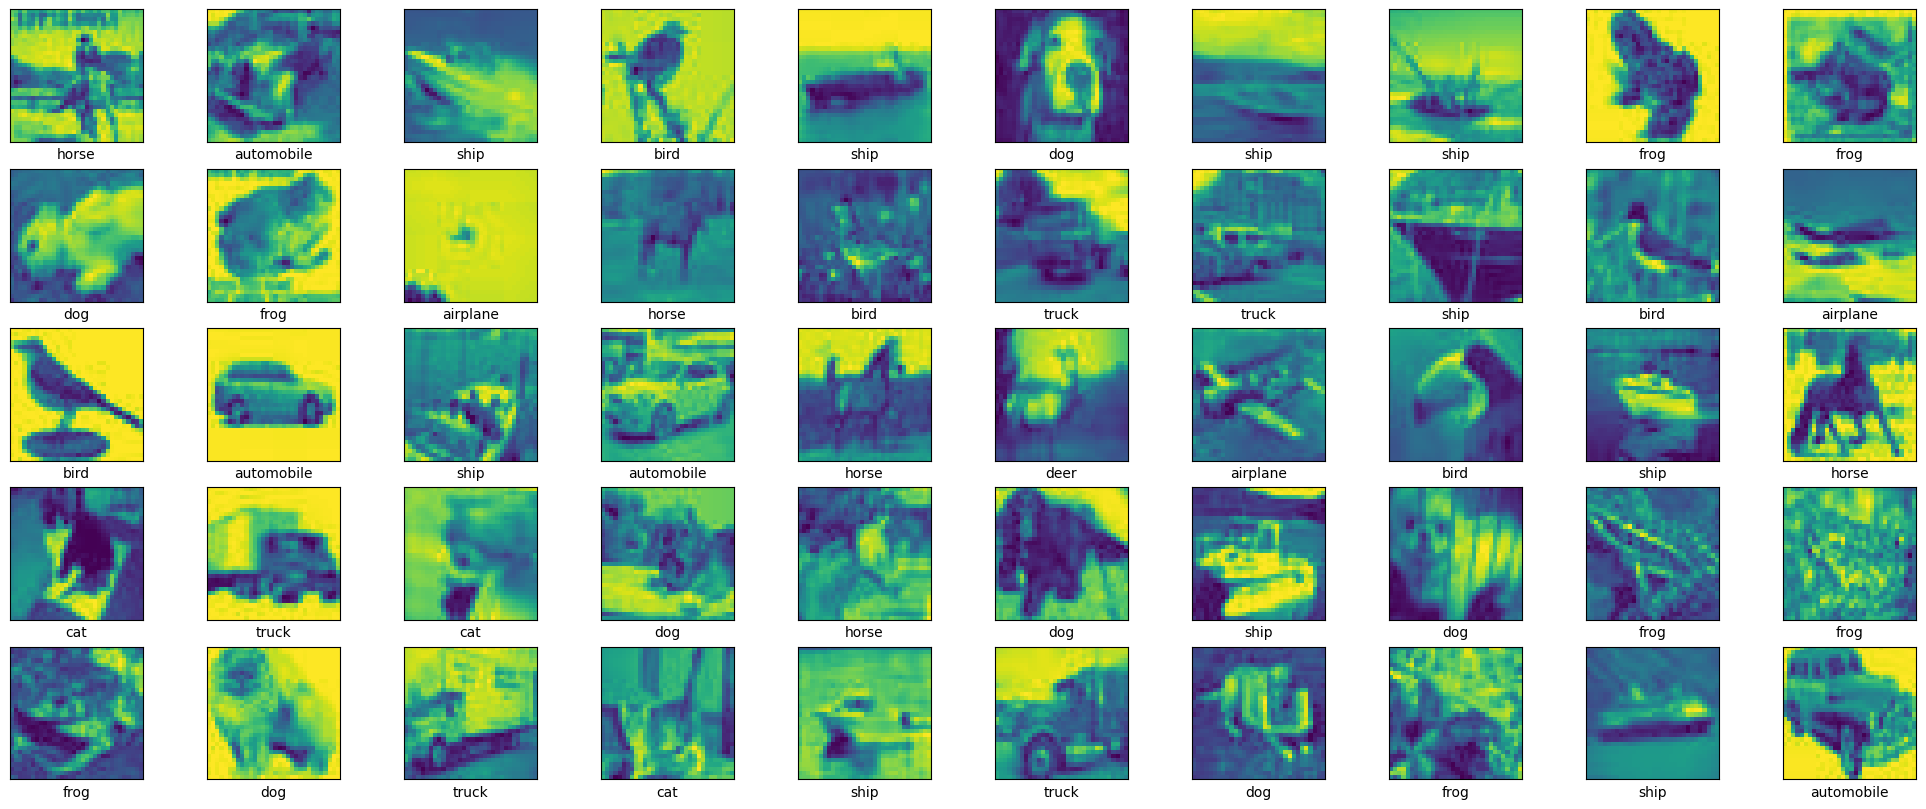

In [12]:
random.shuffle(TRAIN_DATA)

plt.figure(figsize=(25,10))
for i in range(50):
    plt.subplot(5,10,i+1)
    plt.imshow(TRAIN_DATA[i][0])
    plt.xlabel(CATEGORIES[TRAIN_DATA[i][1]])
    plt.xticks([])
    plt.yticks([])
    if i==50:
        break
plt.show()


In [13]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

data, labels = zip(*TRAIN_DATA)
data = np.array(data)
labels = np.array(labels)

k_values = [1, 3, 5, 7, 9]

distance_metrics = ['manhattan', 'euclidean']

results = {distance_metric: [] for distance_metric in distance_metrics}

kf = KFold(n_splits=5)

for distance_metric in distance_metrics:
    for k in k_values:
        accuracy_scores = []
        for train_indices, val_indices in kf.split(data):
            train_data = data[train_indices]
            train_labels = labels[train_indices]
            val_data = data[val_indices]
            val_labels = labels[val_indices]

            classifier = KNeighborsClassifier(n_neighbors=k, metric=distance_metric)
            classifier.fit(train_data.reshape(len(train_data), -1), train_labels)

            predictions = classifier.predict(val_data.reshape(len(val_data), -1))

            accuracy = accuracy_score(val_labels, predictions)
            accuracy_scores.append(accuracy)

        mean_accuracy = np.mean(accuracy_scores)
        results[distance_metric].append(mean_accuracy)

# Print the results
for distance_metric, accuracy_values in results.items():
    print(f"Distance Metric: {distance_metric.capitalize()}")
    for k, accuracy in zip(k_values, accuracy_values):
        print(f"k = {k}, Average Accuracy: {accuracy:.4f}")
    print()


Distance Metric: Manhattan
k = 1, Average Accuracy: 0.2578
k = 3, Average Accuracy: 0.2568
k = 5, Average Accuracy: 0.2692
k = 7, Average Accuracy: 0.2748
k = 9, Average Accuracy: 0.2740

Distance Metric: Euclidean
k = 1, Average Accuracy: 0.2382
k = 3, Average Accuracy: 0.2334
k = 5, Average Accuracy: 0.2469
k = 7, Average Accuracy: 0.2473
k = 9, Average Accuracy: 0.2440



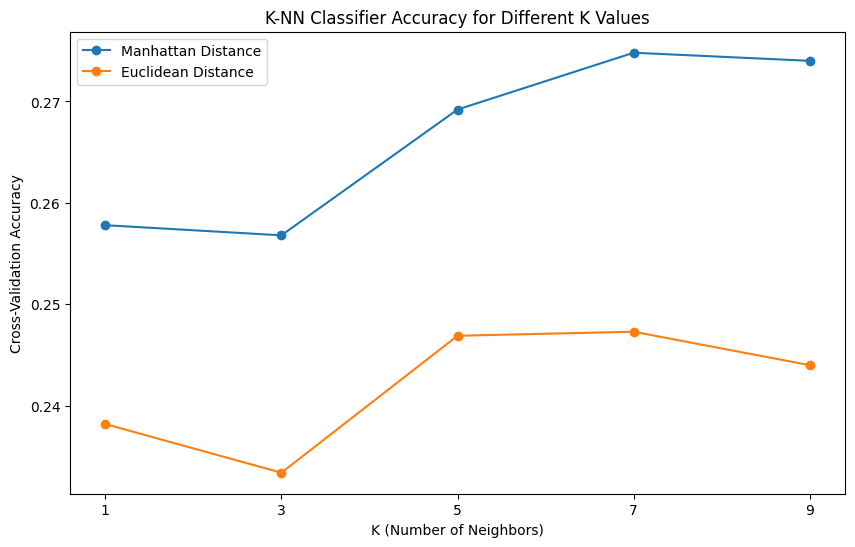

In [14]:
# Plot the results
plt.figure(figsize=(10, 6))
for distance_metric, accuracy_values in results.items():
    plt.plot(k_values, accuracy_values, marker='o', label=f'{distance_metric.capitalize()} Distance')

plt.xlabel('K (Number of Neighbors)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-NN Classifier Accuracy for Different K Values')
plt.xticks(k_values)
plt.legend()
plt.show()

Discussion : 

The comparison of Manhattan (L1) and Euclidean (L2) distances in the context of a 5-fold cross-validation on a grayscale dataset provides insights into the suitability of these distance calculation techniques for the specific classification task.

For Manhattan distance and Euclidean distance similar trends are observed where an increase in K leads to a slightly improved average accuracy. Both distances (L1 & L2) achieved highest average accuracy while nearest neighbor K = 7. And, in comparison to Manhattan distance, Euclidean distance exhibits slightly lower average accuracy across all values of K. Manhattan distance perform better when features are highly relevant and don’t exhibit strong correlations and Euclidean distance is often sensitive to feature correlations and it can be influenced by outliers.

Grayscale images typically have features (pixel values) with a uniform scale, making Manhattan distance more suitable. As a robust distance metric Manhattan distance is effective when dealing with features that have different scales or units like image data, pixel values have a uniform scale and unit.

The choice between Manhattan and Euclidean distances depends on dataset characteristics, feature correlation, and the complexity of classes. Both distances exhibited similar trends, with accuracy increasing as K increased. And, the low overall classification accuracy suggests the need for advanced algorithms, feature engineering, and potentially deep learning methods.


Total Test Images: 10


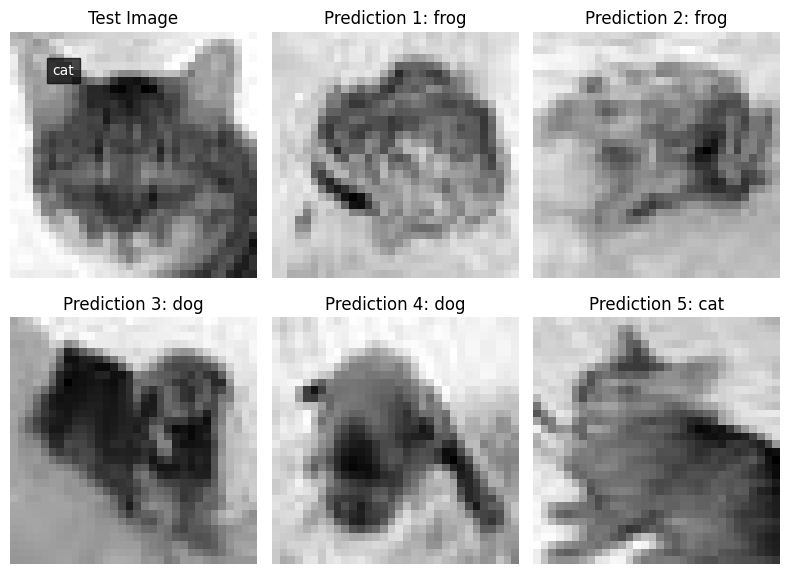

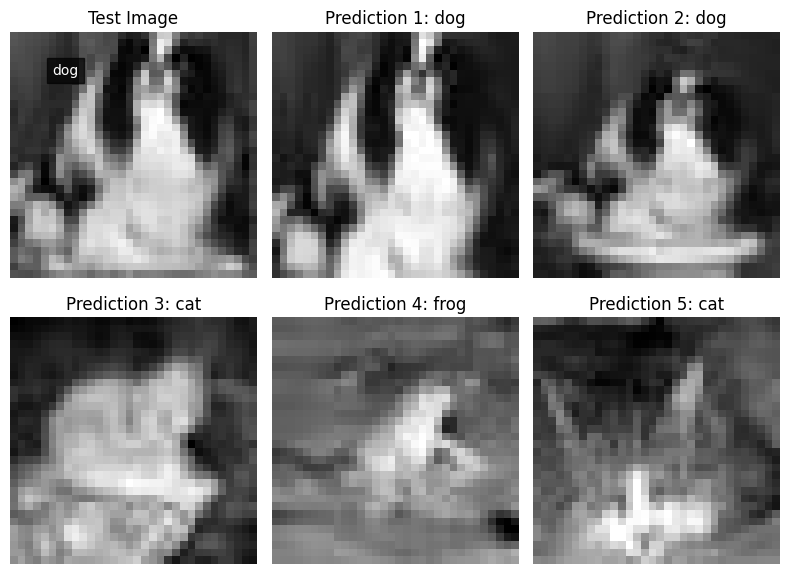

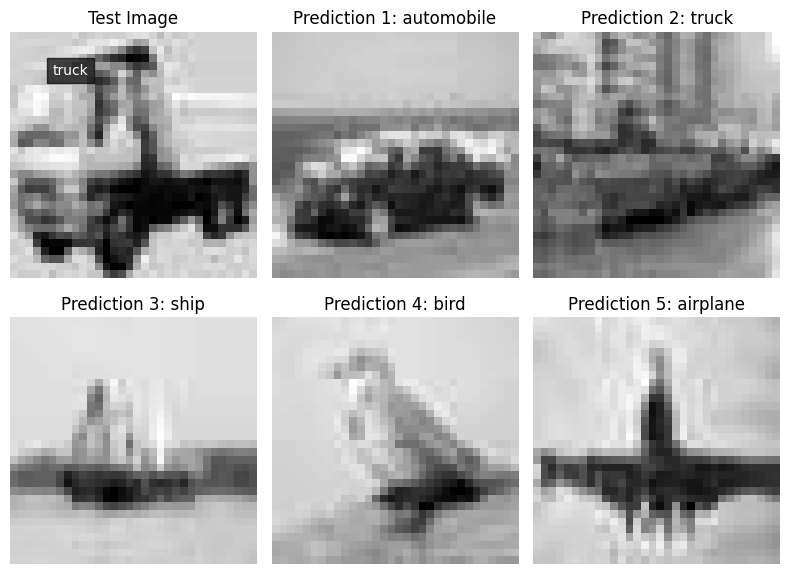

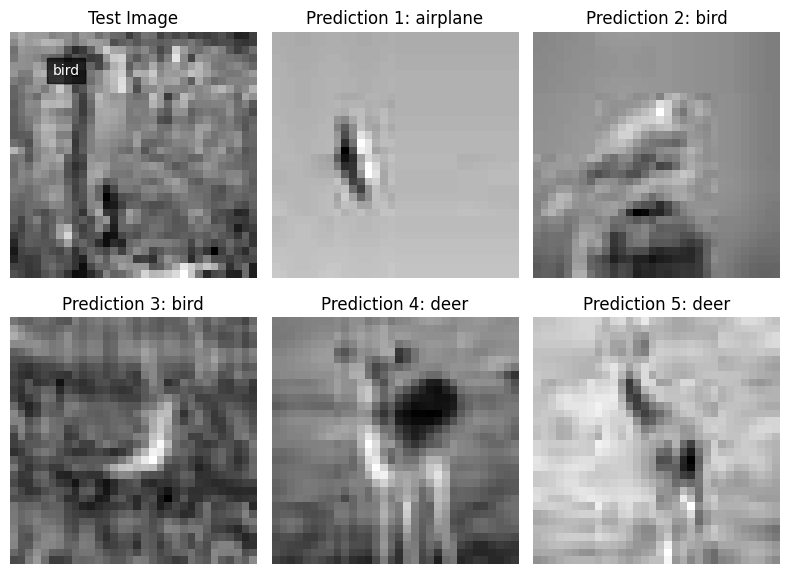

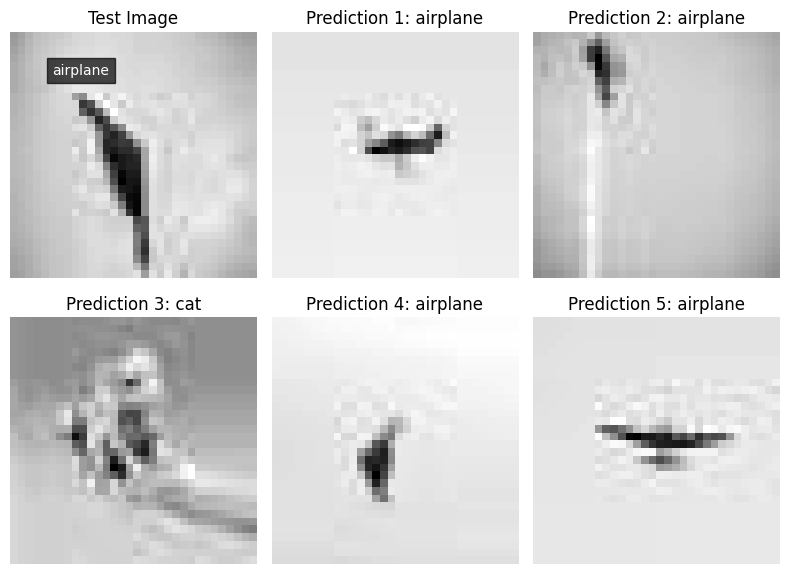

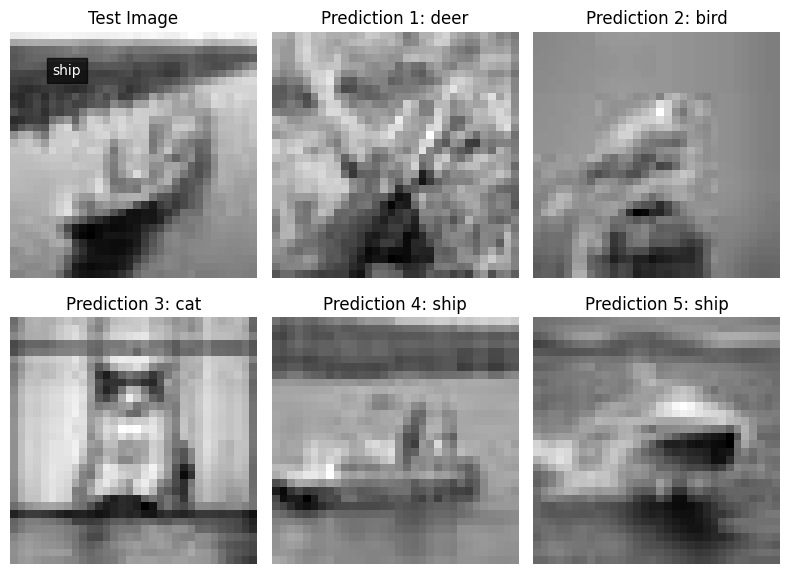

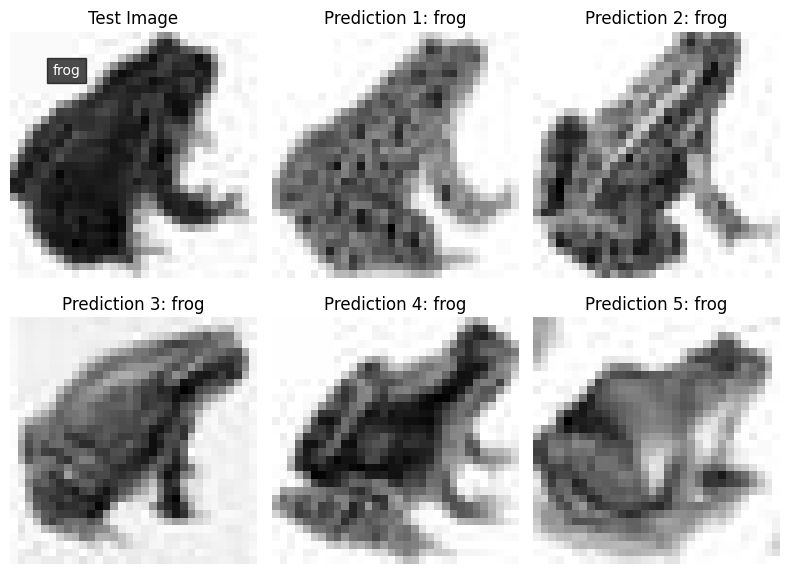

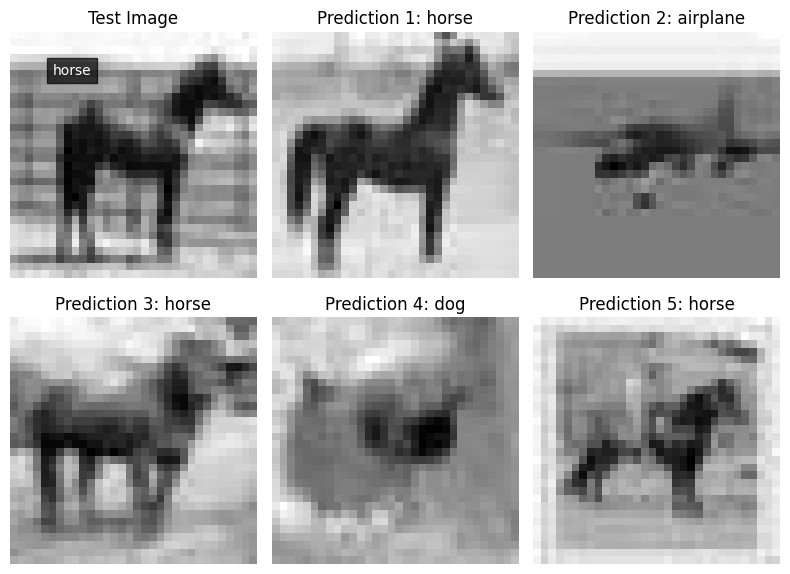

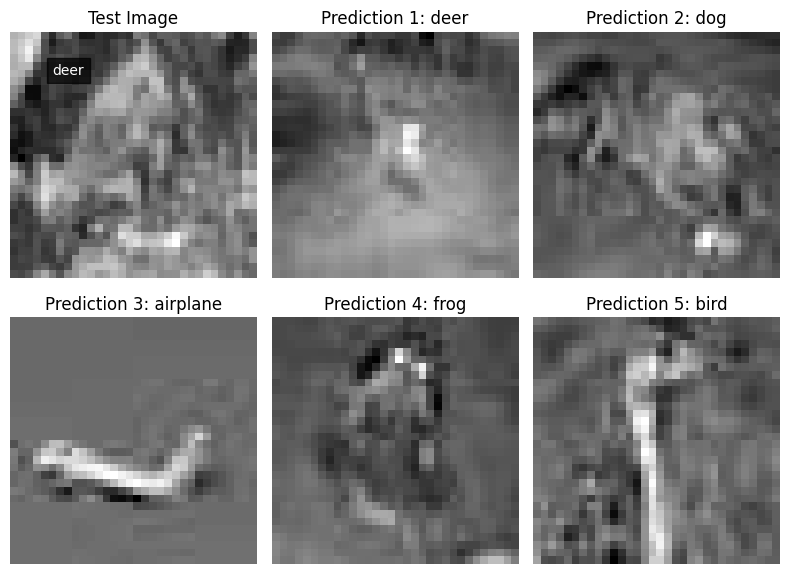

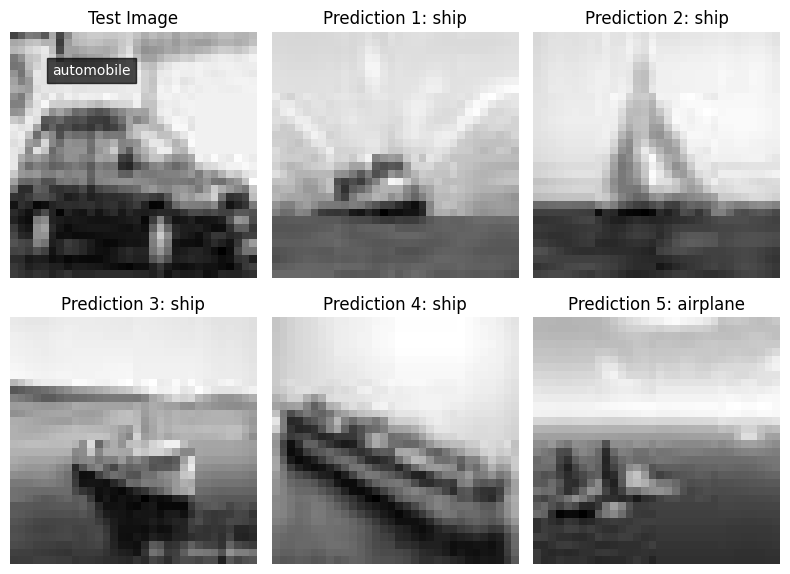

In [15]:
from sklearn.impute import SimpleImputer

TEST_DIR = '/Users/shaaky/Codes/CVPR/train2'
test_images = []

for c in CATEGORIES:
    path = os.path.join(TEST_DIR, c)
    label = CATEGORIES.index(c)
    img_list = os.listdir(path)
    
    if len(img_list) > 0:
        # Select a random image from each category
        random_index = random.randint(0, len(img_list) - 1)
        img_path = os.path.join(path, img_list[random_index])
        img_arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img_arr = cv2.resize(img_arr, (32, 32))
        test_images.append([img_arr, c])  # Label with category name

print(f"Total Test Images: {len(test_images)}")

test_data = np.array([image[0] for image in test_images]).reshape(len(test_images), -1)

predictions = classifier.predict(test_data)

for i, test_image in enumerate(test_images):
    plt.figure(figsize=(8, 6))
    plt.subplot(2, 3, 1)
    plt.imshow(test_image[0], cmap='gray')
    plt.title(f'Test Image')  # Display category name as title
    plt.axis('off')
    
    plt.text(5, 5, test_image[1], color='white', fontsize=10,bbox=dict(facecolor='black', alpha=0.7))

    distances, indices = classifier.kneighbors(test_data[i].reshape(1, -1), n_neighbors=5)
    
    for j, index in enumerate(indices[0]):
        plt.subplot(2, 3, j + 2)
        plt.imshow(data[index].reshape(32, 32), cmap='gray')
        plt.title(f'Prediction {j + 1}: {CATEGORIES[labels[index]]}')
        plt.axis('off')

    plt.tight_layout()
    plt.show()
